# FDFD.jl Examples

First, we need to import the `FDFD` and `FDFDViz` packages. These aren't registered in the Julia package manager so you will need to issue the commands:
```
Pkg.clone("https://github.com/ianwilliamson/FDFD.jl")
Pkg.clone("https://github.com/ianwilliamson/FDFDViz.jl")
```
The package `GeometryPrimitives`, available from https://github.com/stevengj/GeometryPrimitives.jl, can be used in addition to functions for setting the geometry.

In [ ]:
using FDFD, FDFDViz, GeometryPrimitives

---

## Example 1: radiating dipole
As the heading suggestions, this demonstrates a simple radiating dipole in free space.

In [2]:
grid0 = Grid(0.01, [15 15], [-3 3], [-3 3]);
dev0  = Device(grid0, 2*π*200e12);
setup_src!(dev0, [0 0]);
field_dipole = solve(dev0);

 Grid size: [600, 600]
 ======= Frequency: 1/1 =======
 Solving linear system
 Num unknowns: 3.60E+05
 Solver: Julia
 Solve time: 0.15 minutes


Next, use the helper function `plot_field()` to display the radiated field.

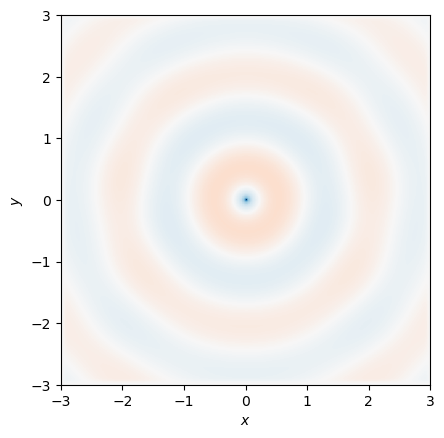

In [3]:
plot_field(field_dipole, funcz=real);

---

## Example 2: waveguide transition
This demonstrates an indirect photonic mode transition in a waveguide. The even mode is launched from the left and is converted to the odd mode as it propagates.

In [4]:
grid1 = Grid(0.01, [15 10], [0.0 15.0], [-1.0 1.0]);
dev1 = ModulatedDevice(grid1, 2π*1.939e14, 4.541e14, 1)

a = 0.2202;
q = 2.9263;

region_wg(x,y) = -a/2<=y<=a/2;
region_modulation(x,y) = 1.5<=x<=11.7 && -a/2<=y<=0;
modulation_function(x,y) = exp.(1im*q*x);

setup_ϵᵣ!(dev1, region_wg, 12.25);
setup_Δϵᵣ!(dev1, region_modulation, modulation_function);
add_mode!(dev1, Mode(TM, DirectionX, 3.5, [0.2, 0], 4*a));

field_transition = solve(dev1);

 Grid size: [1500, 200]
 ======= Frequency: 1/1 =======
 Calculating: system matrix
 Sidebands (freqs): 1 (3)
 PML: shared
 Calculating: coupling matrix
 Calculating: total matrix
 Solving linear system
 Num unknowns: 9.00E+05
 Solver: Julia
 Solve time: 1.06 minutes
 Processing results


Note that the `add_mode!()` command allows us to specify a "slice" where the solver will perform a modal calculation to excite the 2D domain. We provide `add_mode!()` with a Mode struct that species the properties of this "slice" including the normal direction, the effective index of the mode, the center coordinates, and the width.

Next, use the helper function `plot_field()` to display the solved fields. This function should automatically handle the array of fields returned by `solve()` for the case of a modulated device. Each field corresponds to a different sideband.

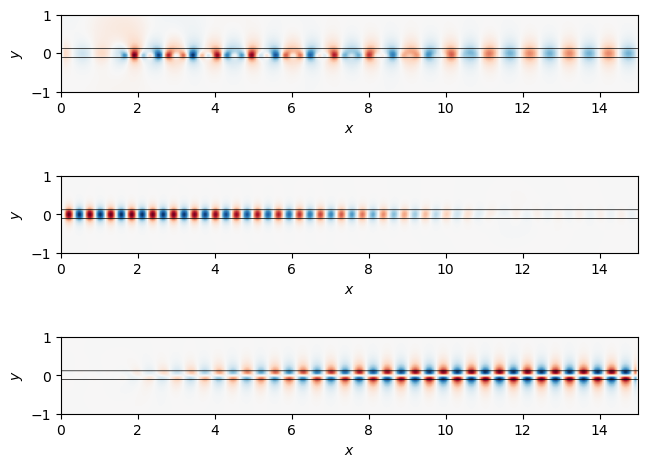

In [6]:
ax = plot_field(field_transition, funcz=real);
plot_device(ax, dev1, outline=true, lcm="none");

### Photon number calculation
Here we check photon number conservation. First calculate the input photon number.

In [7]:
Nin = flux_surface(field_transition[2], [1.25,0], Inf, DirectionX)/(2π*1.939e14)

1.3534426801159498e-20

Then check the output photon number:

In [8]:
Nout = flux_surface(field_transition[3], [11.95,0], Inf, DirectionX)/(4.541e14+2π*1.939e14)+
flux_surface(field_transition[2], [11.95,0], Inf, DirectionX)/(2π*1.939e14)+
flux_surface(field_transition[1], [11.95,0], Inf, DirectionX)/(2π*1.939e14-4.541e14)

1.356637045768947e-20

Finally, take the ratio. This should be very close to unity:

In [9]:
Nout/Nin

1.0023601780111764

---

## Example 3: waveguide coupler

*coming soon*™

---